Throughout this Notebook CIFAR10 Dataset is used. You can find the dataset in the following link as well.

[CIFAR10 Dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

# Part 1


In this part a Linear Classifier is implemented with the score function of *f(x)=Wx+b* and Mean Squared Error is used as the loss function.


a.   Implement gradient descent and run for 300 epochs

b.   Show the weights matrix W as 10 images.

c.   Report the (initial) learning rate, training and testing loss and accuracies



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
#print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

#One-Hot Encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
#Weight Initialising
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)


w1: (3072, 10)
b1: (10,)


In [4]:
epochs = 300
lr = 0.015
lr_decay=0.999
reg = 5e-5
batch_size = Ntr
val_batch_size = Nte
loss_history = []
val_loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)


In [5]:
def find_accuracy(pred,labels):
    pred_class = np.argmax(pred, axis=1)
    ground_truth = np.argmax(labels, axis=1)
    accurate_pred = [pred_class == ground_truth]
    return 100*np.sum(accurate_pred)/len(ground_truth)

In [6]:
for t in range(1,epochs+1):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  #indices = rng.choice(Ntr, batch_size)
  x = x_train[indices]
  y = y_train[indices]

  y_pred = x.dot(w1)+b1

  loss = 1./(batch_size*2)*np.square(y_pred-y).sum()+ reg/(batch_size*2)*(np.sum(w1*w1))
  loss_history.append(loss)

  train_acc = find_accuracy(y_pred, y)
  train_acc_history.append(train_acc)
  
  y_val_pred = x_test.dot(w1)+b1

  val_loss = 1./(val_batch_size*2)*np.square(y_val_pred-y_test).sum()
  val_loss_history.append(val_loss)
  val_acc = find_accuracy(y_val_pred, y_test)
  val_acc_history.append(val_acc)


  if t%10 ==0 or t == epochs:
    print('Epoch %d/%d: Train Loss: %f, Val Loss: %f,  Training Accuracy: %f, Validation Accuracy: %f'%(t, epochs,loss,val_loss, train_acc, val_acc))

  dw1 = 1./batch_size*(x.T.dot(y_pred - y)) + 1./batch_size*reg*w1
  w1 -= lr*dw1

  db1 = 1./batch_size*((y_pred-y).sum(axis =0))
  b1 -= lr*db1

  lr=lr*lr_decay
  

Epoch 10/300: Train Loss: 0.454277, Val Loss: 0.453948,  Training Accuracy: 32.518000, Validation Accuracy: 32.590000
Epoch 20/300: Train Loss: 0.438224, Val Loss: 0.438022,  Training Accuracy: 35.412000, Validation Accuracy: 35.110000
Epoch 30/300: Train Loss: 0.427917, Val Loss: 0.427797,  Training Accuracy: 36.604000, Validation Accuracy: 36.650000
Epoch 40/300: Train Loss: 0.420586, Val Loss: 0.420533,  Training Accuracy: 37.360000, Validation Accuracy: 37.350000
Epoch 50/300: Train Loss: 0.415183, Val Loss: 0.415189,  Training Accuracy: 37.830000, Validation Accuracy: 37.940000
Epoch 60/300: Train Loss: 0.411124, Val Loss: 0.411187,  Training Accuracy: 38.254000, Validation Accuracy: 38.280000
Epoch 70/300: Train Loss: 0.408031, Val Loss: 0.408151,  Training Accuracy: 38.594000, Validation Accuracy: 38.620000
Epoch 80/300: Train Loss: 0.405644, Val Loss: 0.405821,  Training Accuracy: 38.872000, Validation Accuracy: 38.740000
Epoch 90/300: Train Loss: 0.403778, Val Loss: 0.404013, 

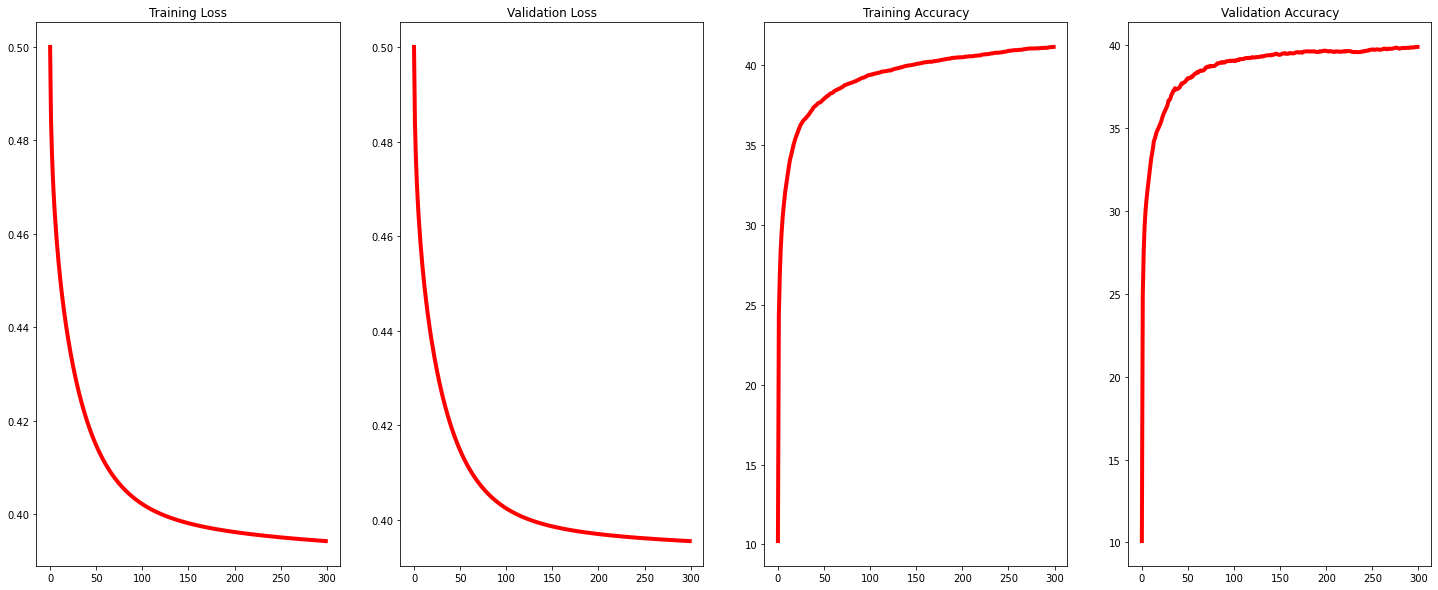

In [12]:
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(25,10))
items = {"Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, "Validation Accuracy": val_acc_history}
i = 1
for key in items.keys():
    plt.subplot(1,4,i);plt.plot(items[key], color ='r', linewidth=4)
    plt.title(key)
    i+=1

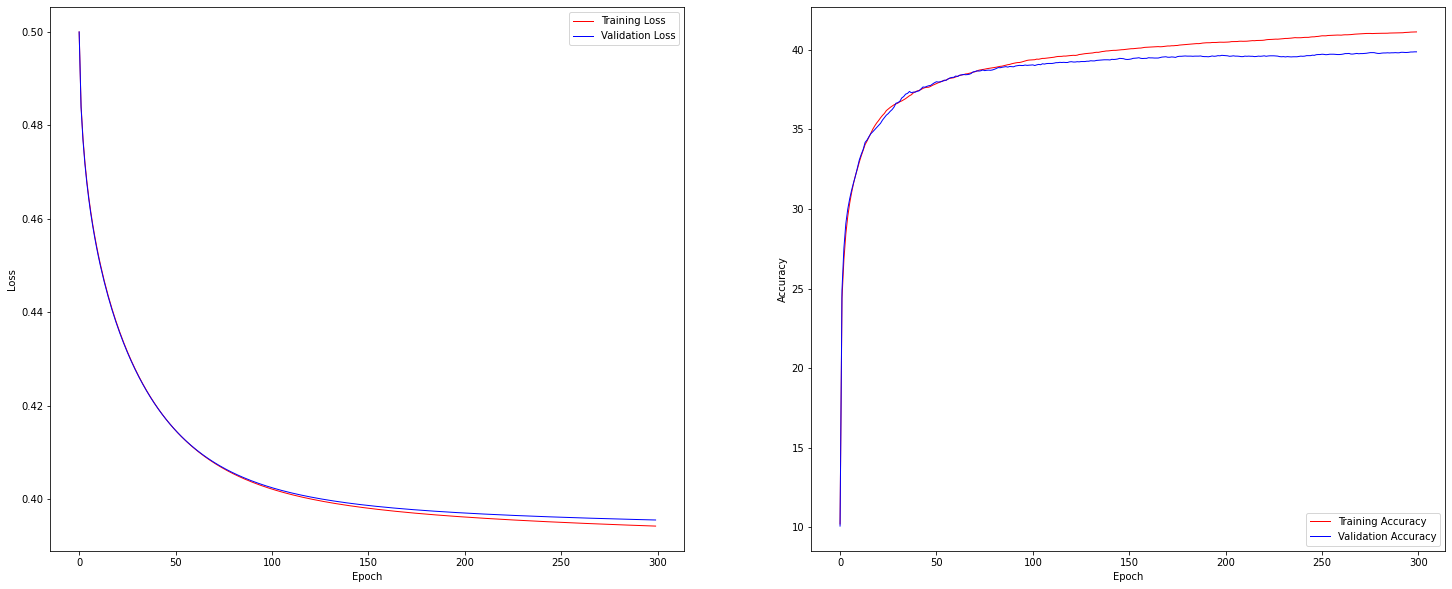

In [16]:
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(25,10))
items = {"Training Loss":loss_history, "Validation Loss":val_loss_history, "Training Accuracy":train_acc_history, "Validation Accuracy": val_acc_history}

plt.subplot(1,2,1);
plt.plot(items['Training Loss'], color ='r', linewidth=1, label ='Training Loss');
plt.plot(items['Validation Loss'], color ='b', linewidth=1, label = 'Validation Loss');
plt.xlabel('Epoch');
plt.ylabel('Loss');
plt.legend(loc='upper right');

plt.subplot(1,2,2);
plt.plot(items['Training Accuracy'], color ='r', linewidth=1, label ='Training Accuracy');
plt.plot(items['Validation Accuracy'], color ='b', linewidth=1, label = 'Validation Accuracy');
plt.xlabel('Epoch');
plt.ylabel('Accuracy');
plt.legend(loc='lower right');
plt.show()

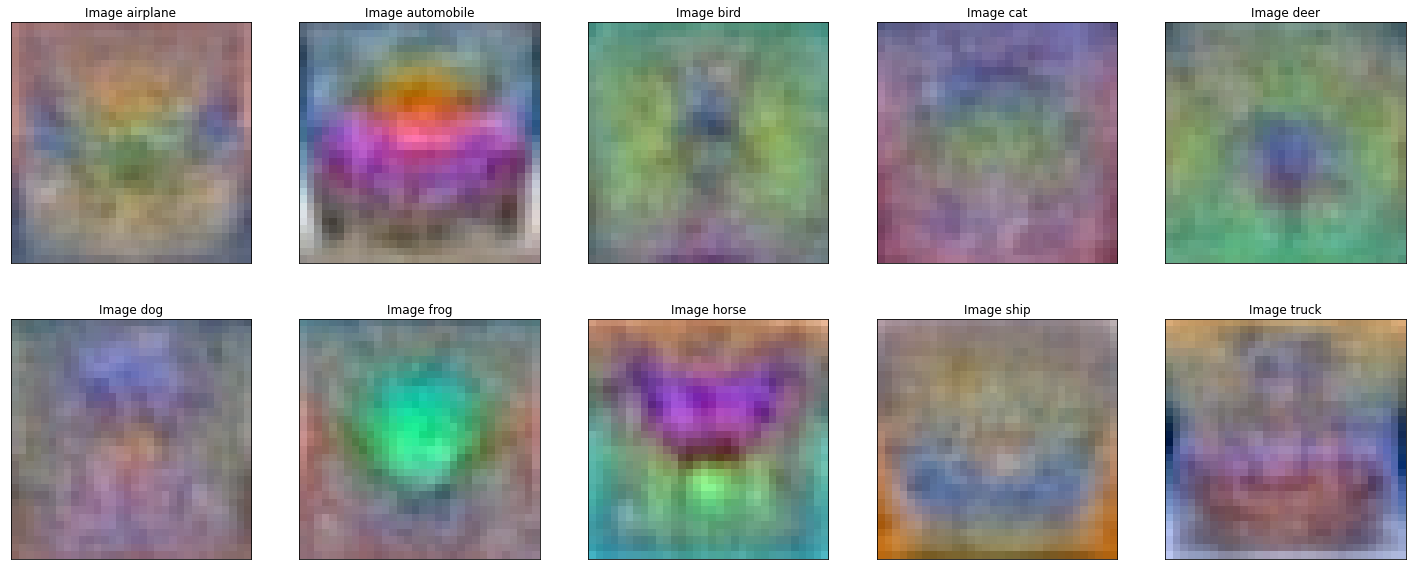

In [8]:

w1 =  w1- np.min(w1)# Making the minimum weight zero.
images = ((w1/np.max(w1))*255).astype('uint8')
fig, axes  = plt.subplots(2,5, sharex='all', sharey='all', figsize=(25,10))
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
location = 1 # Location of the image in the grid of 2x5
for i in range(K):
    image = images[:,i].reshape(32,32,3)
    plt.subplot(2,5,location),plt.imshow(image[:,:,::-1])
    plt.title("Image "+ classes[i]),
    plt.xticks([])
    plt.yticks([])      
    location+=1

plt.show()